In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ml_utils import train_test_split
from classification_tree import ID3DecisionTreeClassifier

In [74]:
PATH = "weather_classification_data.csv"
dataset = pd.read_csv(PATH)
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [76]:
cols = []
for column in dataset:
    if type(dataset[column][0]) is str:
        dataset[column] = pd.factorize(dataset[column])[0]
        cols.append(column)

In [77]:
dataset = dataset[cols]

<Axes: >

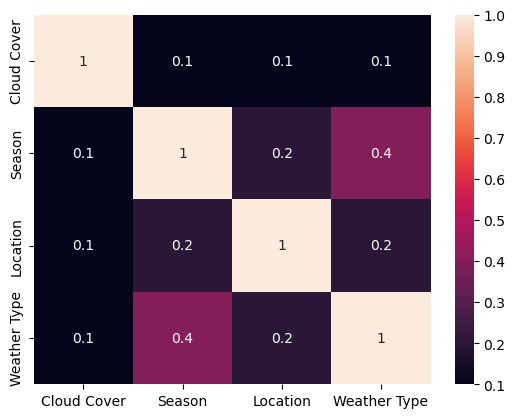

In [78]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

In [79]:
test_size = 0.2
label = "Weather Type"

train, test = train_test_split(dataset, test_size, random_state=42)

train_x = train.drop(label, axis=1)
train_y = train[label]

test_x = test.drop(label, axis=1)
test_y = test[label]

In [80]:
model = ID3DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(train_x, train_y)

In [81]:
predictions = model.predict(test_x)

In [82]:
import sklearn

Text(0.5, 1.0, 'Матрица сходства')

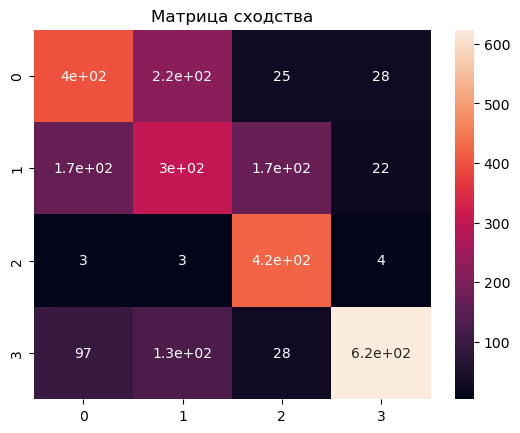

In [83]:
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_y)

sns.heatmap(
    confusion_matrix,
    annot=True
)

plt.title('Матрица сходства')